In [1]:
import h5py
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# fp = r"D:\cleo\master\pyaw\data\ZH-1\HPM\FGM\CSES_01_HPM_5_L02_A2_106060_20191231_231400_20191231_235019_000.h5"
fp1 = "data/ZH-1/HPM/CSES_01_HPM_5_L02_A2_096800_20191101_010700_20191101_014311_000.h5"
fp2 = "data/ZH-1/HPM/CSES_01_HPM_5_L02_A2_096810_20191101_024144_20191101_031756_000.h5"

In [3]:
# # Open the HDF5 file in read mode
# with h5py.File(fp, 'r') as hdf:
#     # Create an empty dictionary to hold dataset names and data
#     data_dict = {}
# 
# 
#     # Recursively iterate through groups and datasets
#     def recursively_extract_data(group, data_dict):
#         for key in group.keys():
#             item = group[key]
#             if isinstance(item, h5py.Dataset):
#                 data = item[:]
#                 # Check the shape of the dataset
#                 if data.shape[1] == 1:
#                     # Flatten the (n,1) dataset to a single column
#                     data_dict[key] = data.flatten()
#                 elif data.shape[1] == 3:
#                     # Split the (n,3) dataset into 3 separate columns
#                     data_dict[f'{key}1'] = data[:, 0]
#                     data_dict[f'{key}2'] = data[:, 1]
#                     data_dict[f'{key}3'] = data[:, 2]
#             elif isinstance(item, h5py.Group):
#                 # If the item is a group, recursively extract its datasets
#                 recursively_extract_data(item, data_dict)
# 
# 
#     recursively_extract_data(hdf, data_dict)
# 
#     # Convert the dictionary to a pandas DataFrame
#     df = pd.DataFrame(data_dict)

In [4]:
# Open the HDF5 file in read mode
with h5py.File(fp1, 'r') as hdf:
    # Create an empty dictionary to hold dataset names and data
    data_dict = {}


    # Recursively iterate through groups and datasets
    def recursively_extract_data(group, data_dict):
        for key in group.keys():
            item = group[key]
            if isinstance(item, h5py.Dataset):
                data = item[:]
                # Check the shape of the dataset
                if data.shape[1] == 1:
                    # Flatten the (n,1) dataset to a single column
                    data_dict[key] = data.flatten()
                elif data.shape[1] == 3:
                    # Split the (n,3) dataset into 3 separate columns
                    data_dict[f'{key}1'] = data[:, 0]
                    data_dict[f'{key}2'] = data[:, 1]
                    data_dict[f'{key}3'] = data[:, 2]
            elif isinstance(item, h5py.Group):
                # If the item is a group, recursively extract its datasets
                recursively_extract_data(item, data_dict)


    recursively_extract_data(hdf, data_dict)

    # Convert the dictionary to a pandas DataFrame
    df1 = pd.DataFrame(data_dict)
    
# Open the HDF5 file in read mode
with h5py.File(fp2, 'r') as hdf:
    # Create an empty dictionary to hold dataset names and data
    data_dict = {}


    # Recursively iterate through groups and datasets
    def recursively_extract_data(group, data_dict):
        for key in group.keys():
            item = group[key]
            if isinstance(item, h5py.Dataset):
                data = item[:]
                # Check the shape of the dataset
                if data.shape[1] == 1:
                    # Flatten the (n,1) dataset to a single column
                    data_dict[key] = data.flatten()
                elif data.shape[1] == 3:
                    # Split the (n,3) dataset into 3 separate columns
                    data_dict[f'{key}1'] = data[:, 0]
                    data_dict[f'{key}2'] = data[:, 1]
                    data_dict[f'{key}3'] = data[:, 2]
            elif isinstance(item, h5py.Group):
                # If the item is a group, recursively extract its datasets
                recursively_extract_data(item, data_dict)


    recursively_extract_data(hdf, data_dict)

    # Convert the dictionary to a pandas DataFrame
    df2 = pd.DataFrame(data_dict)

In [6]:
df = pd.concat([df1, df2], ignore_index=True)

In [8]:
df['DATETIME'] = pd.to_datetime(df['UTC_TIME'].astype(str), format='%Y%m%d%H%M%S%f')

<Axes: >

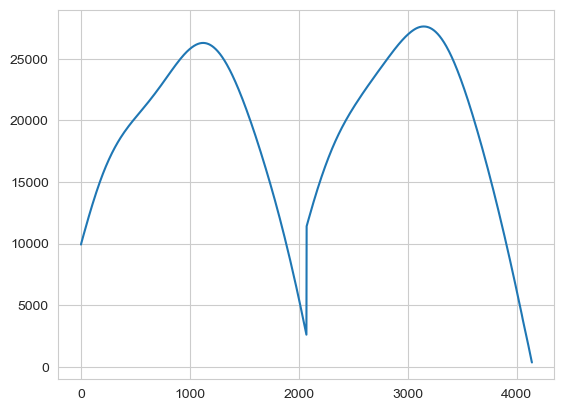

In [9]:
df['A221'].plot()

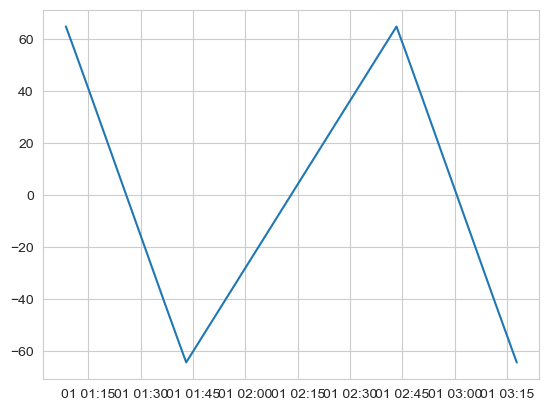

In [10]:
plt.plot(df['DATETIME'],df['GEO_LAT'])

In [15]:
df1['UTC_TIME'].iloc[-1],df2['UTC_TIME'].iloc[0]

(20191101014303000, 20191101024319000)

In [13]:
(df['GEO_LAT']>60).sum()

80

In [25]:
slat_dt = df['DATETIME'][df['GEO_LAT'][df['GEO_LAT']>60].index[0]]
eslat_dt = df['DATETIME'][df['GEO_LAT'][df['GEO_LAT']>60].index[-1]]

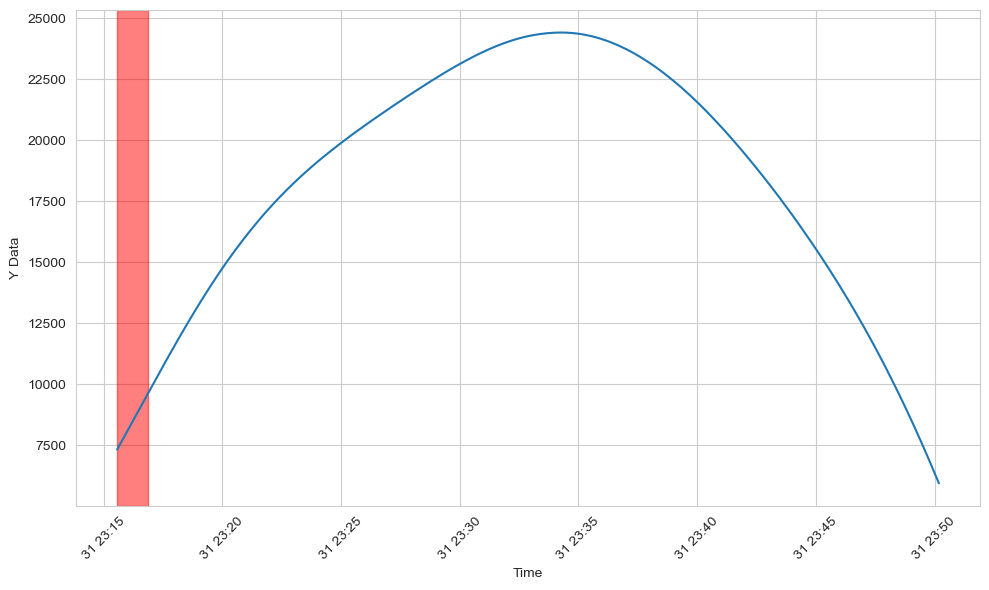

In [27]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data (time vs y_data)
ax.plot(df['DATETIME'], df['A221'])
ax.set_xlabel('Time')
ax.set_ylabel('Y Data')
ax.tick_params(axis='x', rotation=45)

plt.axvspan(slat_dt, eslat_dt, alpha=0.5, color='red')

# Show the plot
plt.tight_layout()
plt.show()


In [14]:
df['GEO_LAT']

0       64.860832
1       64.800499
2       64.740143
3       64.679787
4       64.619408
          ...    
2073   -64.070473
2074   -64.130814
2075   -64.191147
2076   -64.251465
2077   -64.311768
Name: GEO_LAT, Length: 2078, dtype: float32